In [14]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression


#For math operations
import math

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv('/content/weatherAUS (1).csv')

print("Total no.of points = {}".format(data.shape[0]))
data.head(5)

Total no.of points = 142193


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RISK_MM          False
RainTomorrow     False
dtype: bool

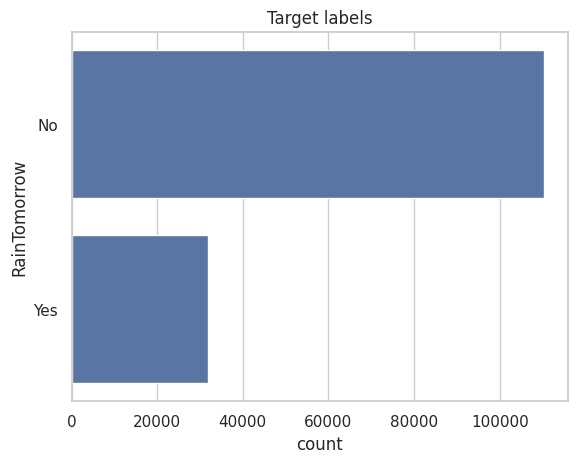

In [18]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()

In [19]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

In [20]:
#Observing the mode for all columns when RainTomorrow = Yes
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,W,9.0,17.0,99.0,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No,1.2,Yes


In [21]:
#Observing the mode for all columns when RainTomorrow = No
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2014-03-18,Canberra,11.0,20.0,0.0,4.0,11.0,E,35.0,N,SE,9.0,13.0,65.0,52.0,1017.9,1015.5,1.0,1.0,16.0,20.0,No,0.0,No


In [22]:
data_no['MaxTemp'].median()

23.3

In [23]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [24]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [26]:
data_filled = pd.concat([data_yes, data_no], ignore_index=True)

In [27]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [28]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 60.14642070988023%


In [29]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [30]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction
data_final = data_filled.drop(['Date', 'Location','RISK_MM'], axis=1)

In [31]:
data_final.shape

(56669, 21)

<Axes: >

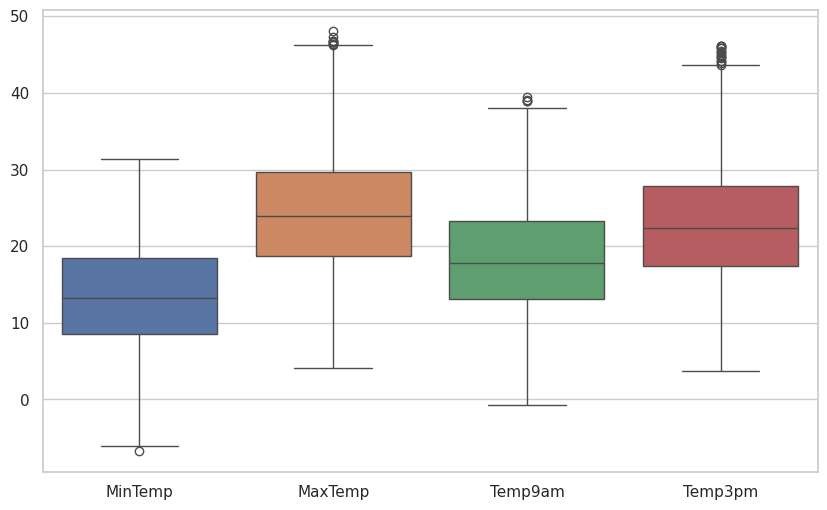

In [32]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

<Axes: >

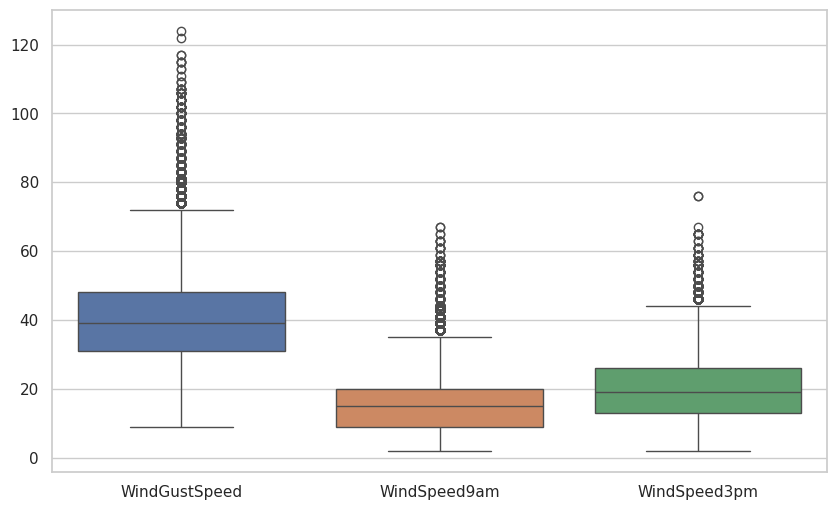

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

<Axes: >

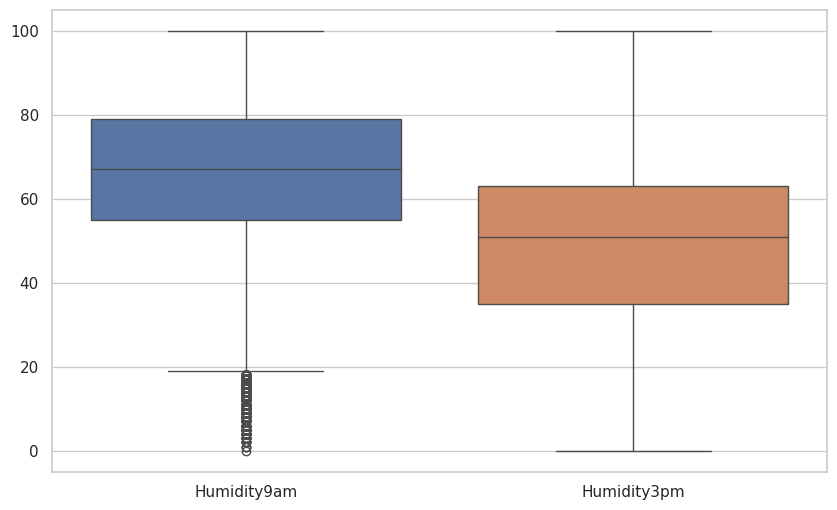

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

In [35]:
data_final= data_final[data_final['Humidity3pm']!=0.0]
data_final= data_final[data_final['Humidity9am']!=0.0]

<Axes: >

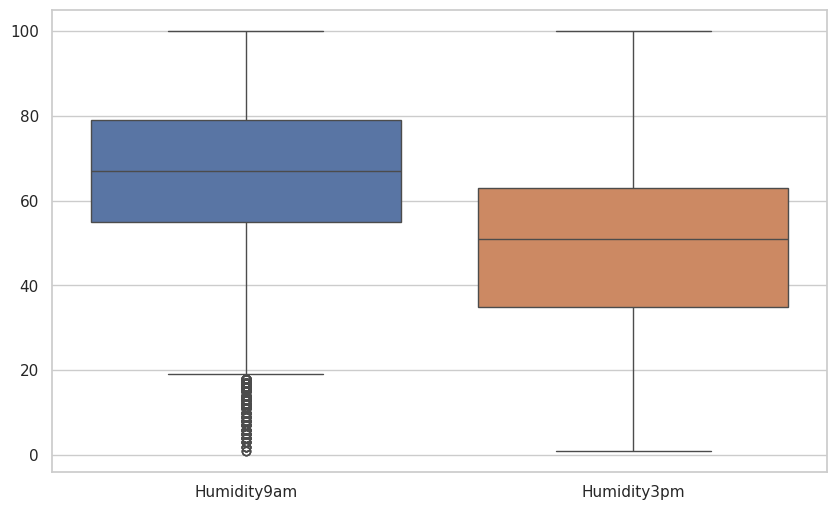

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

<Axes: >

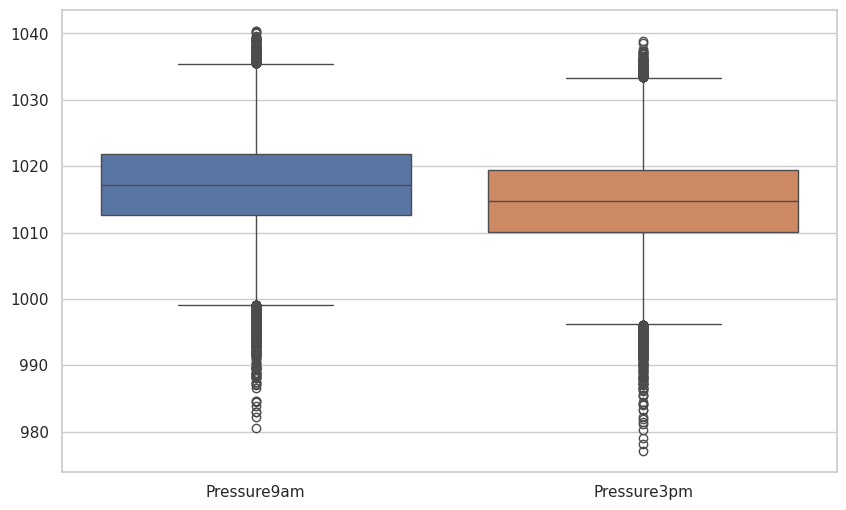

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am','Pressure3pm']])

<Axes: >

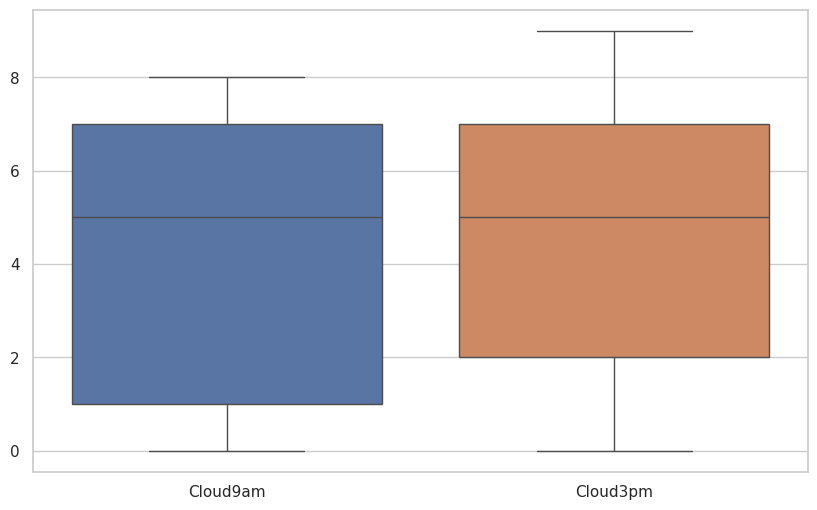

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Cloud9am','Cloud3pm']])

<Axes: >

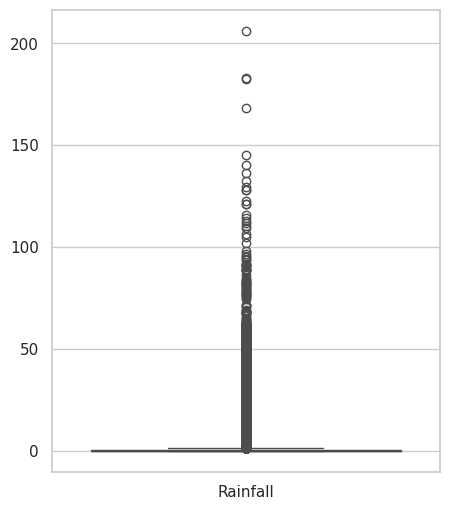

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

<Axes: >

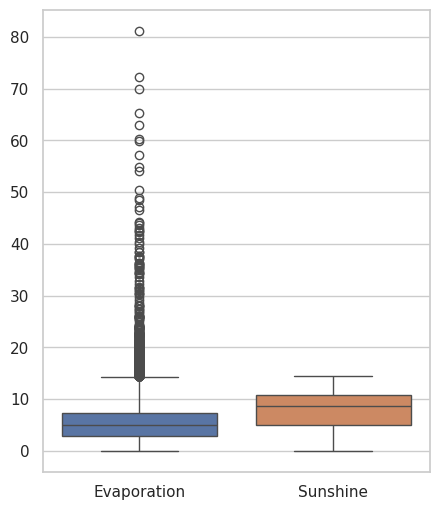

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Evaporation','Sunshine']])

In [41]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [42]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [43]:
column_names=X.columns.tolist()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

In [45]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
def plotErrors(k,train,cv):

    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

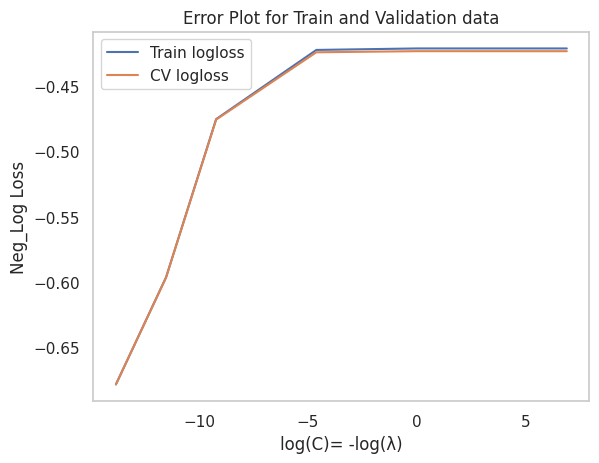

In [47]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score']

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [48]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [49]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [50]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.4213637502330669
Log_loss on test data is :0.42841877762531966


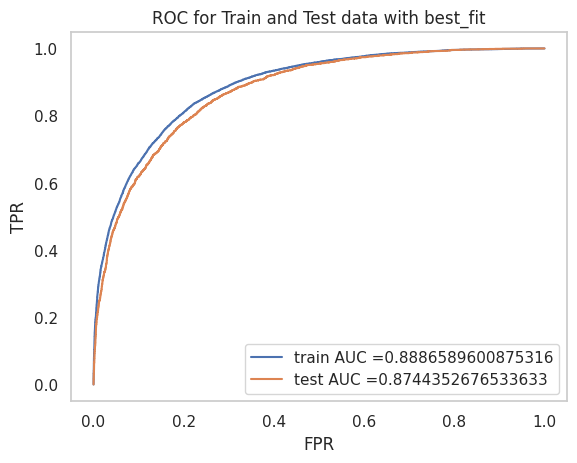

In [51]:
#Plotting AUC
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

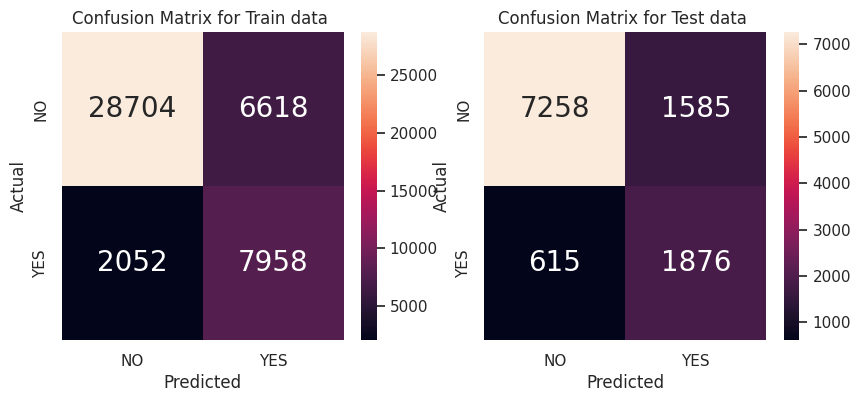

In [53]:
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',annot_kws={'size':20}); #Removed yticklabels
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual');
    ax.set_title('Confusion Matrix for {} '.format(title));
    ax.xaxis.set_ticklabels(['NO', 'YES']);
    ax.yaxis.set_ticklabels(['NO', 'YES']); #This line might still cause issues if the y-axis only has one tick


fig, subplt = plt.subplots(1, 2,figsize=(10, 4))
cm=confusion_matrix(y_train, clf.predict(X_train))
ax= subplt[0]
plotcm(cm,ax,'Train data')

cm=confusion_matrix(y_test, clf.predict(X_test))
ax= subplt[1]
plotcm(cm,ax,'Test data')

In [54]:
clf.coef_[0]

array([-0.272718  , -0.01888115,  0.10988243, -0.06915256, -0.62728539,
        0.12245798,  0.84953389, -0.03214127, -0.03536307, -0.09534929,
       -0.24119127,  0.06394845,  1.1370843 ,  0.99791459, -1.41556721,
       -0.09055778,  0.30180472,  0.26363375,  0.12924531,  0.17698128])

In [55]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [56]:
feature_weights

[(1.1370843016939374, 'Humidity3pm'),
 (0.9979145915734955, 'Pressure9am'),
 (0.8495338941313112, 'WindGustSpeed'),
 (0.3018047151297412, 'Cloud3pm'),
 (0.2636337480671125, 'Temp9am'),
 (0.17698127689999843, 'RainToday'),
 (0.12924531106396575, 'Temp3pm'),
 (0.12245797500558965, 'WindGustDir'),
 (0.10988243260771245, 'Rainfall'),
 (0.06394844711638073, 'Humidity9am'),
 (-0.018881148455341695, 'MaxTemp'),
 (-0.032141265670996795, 'WindDir9am'),
 (-0.03536307190873868, 'WindDir3pm'),
 (-0.06915256258015891, 'Evaporation'),
 (-0.09055778189807435, 'Cloud9am'),
 (-0.0953492851342195, 'WindSpeed9am'),
 (-0.24119127018123354, 'WindSpeed3pm'),
 (-0.27271800233850396, 'MinTemp'),
 (-0.6272853899640596, 'Sunshine'),
 (-1.4155672106223933, 'Pressure3pm')]

In [57]:
def will_rain_fall_for_this_conditions(xq):

    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed))

In [59]:
MinTemp = 15.0
MaxTemp = 25.0
Rainfall = 2.0
Evaporation = 5.0
Sunshine = 8.0
WindGustDir = "W"
WindGustSpeed = 40.0
WindDir9am = "N"
WindDir3pm = "S"
WindSpeed9am = 15.0
WindSpeed3pm = 20.0
Humidity9am = 70.0
Humidity3pm = 60.0
Pressure9am = 1010.0
Pressure3pm = 1005.0
Cloud9am = 5.0
Cloud3pm = 7.0
Temp9am = 18.0
Temp3pm = 23.0
RainToday = "No"

point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

# Now you can use 'xq' for further processing